In [8]:
import sys 
sys.path.append('../../')
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from comp_models import conf_all_models_values
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 

In [9]:
def get_preds(CITY):
    with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)

    with open(f'../../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
    
    return data_ml, data_nn, data_tl 


In [10]:
def get_dist(city, ini_evaluate, end_evaluate):

    data_ml, data_nn, data_tl = get_preds(city)

    NN_ss_ML, TL_ss_NN, TL_ss_ML = conf_all_models_values(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    return NN_ss_ML, TL_ss_NN, TL_ss_ML
    

Making a plot using error bars now:

In [15]:
def get_errors(city, ini_dates, end_dates, pos ):
    
    out_dist = get_dist(city, ini_dates, end_dates)[pos]
    
    median = np.median(out_dist.bootstrap_distribution)
    lower =  out_dist.confidence_interval[0]
    upper =  out_dist.confidence_interval[1]
    
    return median -lower, median, upper-median


In [16]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.6 #set the value global

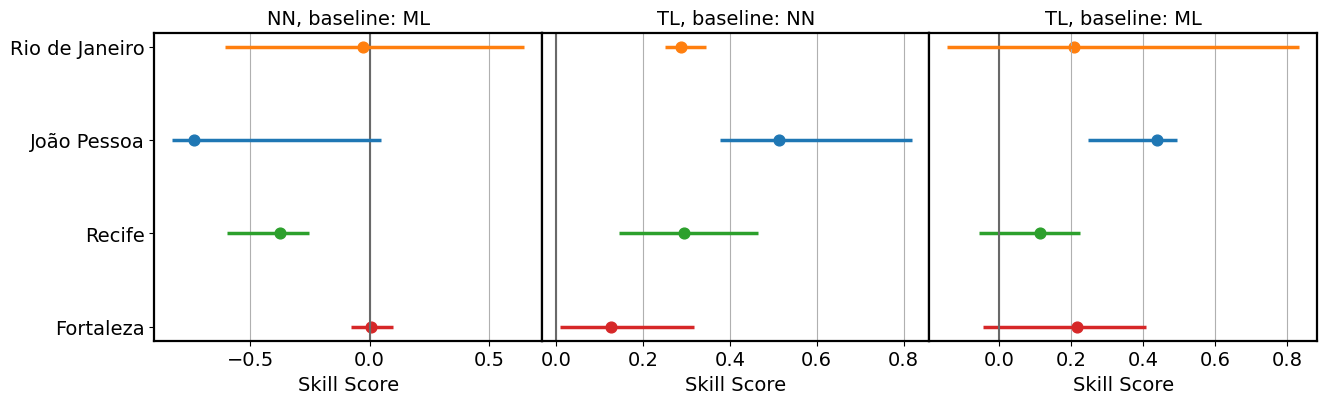

In [17]:
plt.figure(figsize = (15,4))

ax = plt.subplot(131)

l,m,u  = get_errors(city[0], ini_dates[0], end_dates[0], 0)
    
ax.scatter(m, 0.2, s=60, color = 'tab:red')

ax.errorbar(m, 0.2 ,
            xerr = np.array([[l],[u]]), linewidth=2.5,  color = 'tab:red' )

ax.axvline(0, color = 'dimgrey')

l,m,u  = get_errors(city[1], ini_dates[1], end_dates[1], 0)
    
ax.scatter(m, 0.4,s=60, color = 'tab:green')

ax.errorbar(m, 0.4 ,
            xerr = np.array([[l],[u]]),linewidth=2.5, color = 'tab:green' )


l,m,u  = get_errors(city[2], ini_dates[2], end_dates[2], 0)
    
ax.scatter(m, 0.6, s=60, color = 'tab:blue')

ax.errorbar(m, 0.6 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:blue' )


l,m,u  = get_errors(city[3], ini_dates[3], end_dates[3], 0)
    
ax.scatter(m, 0.8, s=60, color = 'tab:orange')

ax.errorbar(m, 0.8 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:orange' )


ax.set_title('NN, baseline: ML', fontsize = 14)

ax.set_xlabel('Skill Score', fontsize = 14)

ax.grid(axis = 'x')

ax.set_yticks([0.2,0.4,0.6,0.8], ['Fortaleza', 'Recife', 'João Pessoa', 'Rio de Janeiro'])
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)

#ymin = 0.15
#ymax = 0.85

#ax.set_ylim([ymin, ymax])

ax1 = plt.subplot(132, sharey=ax)

ax1.set_title('TL, baseline: NN', fontsize = 14)

ax1.set_xlabel('Skill Score', fontsize = 14)

ax1.grid(axis = 'x')

l,m,u  = get_errors(city[0], ini_dates[0], end_dates[0], 1)
    
ax1.scatter(m, 0.2,s=60, color = 'tab:red')

ax1.errorbar(m, 0.2 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:red' )


l,m,u  = get_errors(city[1], ini_dates[1], end_dates[1], 1)
    
ax1.scatter(m, 0.4,s=60, color = 'tab:green')

ax1.errorbar(m, 0.4 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:green' )


l,m,u  = get_errors(city[2], ini_dates[2], end_dates[2], 1)
    
ax1.scatter(m, 0.6, s=60,color = 'tab:blue')

ax1.errorbar(m, 0.6 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:blue' )


l,m,u  = get_errors(city[3], ini_dates[3], end_dates[3], 1)
    
ax1.scatter(m, 0.8,s=60, color = 'tab:orange')

ax1.errorbar(m, 0.8 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:orange' )

ax1.axvline(0, color = 'dimgrey')

plt.tick_params(left = False, labelleft = False )

    
ax2 = plt.subplot(133, sharey=ax)

ax2.set_title('TL, baseline: ML', fontsize = 14)
ax2.set_xlabel('Skill Score', fontsize = 14)
ax2.grid(axis = 'x')
#ax2.set_ylim([ymin, ymax])

l,m,u  = get_errors(city[0], ini_dates[0], end_dates[0], 2)
    
ax2.scatter(m, 0.2, s=60,color = 'tab:red')

ax2.errorbar(m, 0.2 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:red' )


l,m,u  = get_errors(city[1], ini_dates[1], end_dates[1], 2)
    
ax2.scatter(m, 0.4, s=60, color = 'tab:green')

ax2.errorbar(m, 0.4 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:green' )

ax2.axvline(0, color = 'dimgrey')

l,m,u  = get_errors(city[2], ini_dates[2], end_dates[2], 2)
    
ax2.scatter(m, 0.6, s=60, color = 'tab:blue')

ax2.errorbar(m, 0.6 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:blue' )


l,m,u  = get_errors(city[3], ini_dates[3], end_dates[3], 2)
    
ax2.scatter(m, 0.8, s=60, color = 'tab:orange')

ax2.errorbar(m, 0.8 ,
            xerr = np.array([[l],[u]]), linewidth=2.5, color = 'tab:orange' )

plt.tick_params(left = False, labelleft = False )

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('error_bar_ss.png',bbox_inches='tight', dpi = 300)
plt.show()